In [1]:
import pandas
sentence_data = pandas.read_csv('data/sentence_sets_trimmed.csv', encoding='unicode_escape', engine='python')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Setup train and test sets

train = sentence_data.sample(frac=0.8,random_state=200)
test = sentence_data.drop(train.index)

In [3]:
train

,applicant_id,document,writer_gender,letter_type,applicant_gender,applicant_identify,applicant_identify_group,standardized_lor,us_canadian,usmle_1,usmle_2,applicants_writers,TEXT,full_text,s1,s2,s1_s2,s3,full_text_tokens
867,male_2963,sentence_sets.csv.4180,male,lor,male,white,white,0,1,221,243,male_male,this is a recommendation letter for FIRST_NAME...,this is a recommendation letter for FIRST_NAME...,this is a recommendation letter for FIRST_NAME...,mr * late in his junior year he spent the m...,this is a recommendation letter for FIRST_NAME...,quoting from my colleagues very interested...,175
2987,male_669,sentence_sets.csv.1059,male,lor,male,white,white,0,1,253,262,male_male,| am writing this letter of recommendation on ...,I am writing this letter of recommendation on ...,I am writing this letter of recommendation on ...,it is through my interaction with him during t...,I am writing this letter of recommendation on ...,I also serve as a co director of our 2nd yea...,526
1835,female_1169,sentence_sets.csv.2466,male,chair,female,"hispanic, latino, or of spanish origin|asian -...",hispanic_latino_spanish,0,1,235,230,female_male,it is my pleasure to write a letter of recomme...,it is my pleasure to write a letter of recomme...,it is my pleasure to write a letter of recomme...,as noted in her curriculum vitae she obtaine...,it is my pleasure to write a letter of recomme...,army and was commissioned as a combat medic as...,329
131,male_3033,sentence_sets.csv.4281,male,lor,male,asian - filipino,asian,0,1,196,227,male_male,this letter is to serve as a recommendation fo...,this letter is to serve as a recommendation fo...,this letter is to serve as a recommendation fo...,he recently rotated through my anesthesia depa...,this letter is to serve as a recommendation fo...,id 7mt87kzeg * please dont hesitate to conta...,197
2729,male_802,sentence_sets.csv.1406,male,lor,male,asian - indian,south_asian,0,1,248,240,male_male,| have had the distinct privilege to work with...,I have had the distinct privilege to work with...,I have had the distinct privilege to work with...,he had been rotating on my general and bariatr...,I have had the distinct privilege to work with...,the balance between compassion and efficiency ...,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,female_948,sentence_sets.csv.2681,male,lor,female,white,white,0,1,230,263,female_male,it is my pleasure to write this letter of reco...,it is my pleasure to write this letter of reco...,it is my pleasure to write this letter of reco...,she is beginning her 4 year of medical schoo...,it is my pleasure to write this letter of reco...,et,305
487,male_335,sentence_sets.csv.3852,female,lor,male,white,white,0,1,212,228,male_female,MIDDLE_NAME am pleased to write letter of reco...,MIDDLE_NAME am pleased to write letter of reco...,MIDDLE_NAME am pleased to write letter of reco...,NaN,MIDDLE_NAME am pleased to write letter of reco...,NaN,225
3085,male_2957,sentence_sets.csv.4172,female,lor,male,white,white,0,1,255,268,male_female,this is a letter of reference in support of FI...,this is a letter of reference in support of FI...,this is a letter of reference in support of FI...,during his time as a medical student we have...,this is a letter of reference in support of FI...,please feel free to contact me if you have any...,280
3158,male_780,sentence_sets.csv.1367,male,lor,male,white,white,0,1,258,267,male_male,| have been asked to provide a letter of recom...,I have been asked to provide a letter of recom...,I have been asked to provide a letter of recom...,he displays the skills I feel are most importa...,I have been asked to provide a letter of recom...,so * my service is more demanding and rigorou...,273


In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train.full_text)
X_train_tf = TfidfTransformer().fit_transform(X_train_counts)

In [5]:
X_train_counts.shape

(2628, 16867)

In [14]:
X_train_tf.shape

(2628, 16867)

In [15]:
train.applicant_gender.shape

(2628,)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

le = LabelEncoder()
le.fit(train.applicant_gender)
pipeline = text_clf.fit(train.full_text, train.applicant_gender)

In [22]:
test_counts = count_vect.fit_transform(test.full_text)
test_tfidf = TfidfTransformer().fit_transform(test_counts)

predicted = text_clf.predict(test.full_text)

In [25]:
import numpy as np
np.mean(predicted == test.applicant_gender)

0.7519025875190258

# Features

## Character Features
- number of characters
- number of letters
- number of upper case
- number of digital
- number of white space

## Sentence Features



In [34]:
sentence_data['character_count'] = sentence_data['TEXT'].str.len()
sentence_data['letter_count'] = sentence_data['TEXT'].str.count(r'[A-z]')
sentence_data['upper_case_count'] = sentence_data['TEXT'].str.count(r'[A-Z]')
sentence_data['white_space_count'] = sentence_data['TEXT'].str.count(' ')

In [30]:
applicant_gender

,applicant_id,document,writer_gender,letter_type,applicant_gender,applicant_identify,applicant_identify_group,standardized_lor,us_canadian,usmle_1,...,full_text,s1,s2,s1_s2,s3,full_text_tokens,character_count,letter_count,upper_case_count,white_space_count
0,male_3090,sentence_sets.csv.4358,female,lor,male,white,white,1,1,197,...,this letter serves as the department of medici...,FIRST_NAME LAST_NAME * LAST_NAME waived his r...,this letter serves as the department of medici...,FIRST_NAME LAST_NAME * LAST_NAME waived his r...,these letters are written and compiled by the ...,526,3454,2793,105,640
1,female_267,sentence_sets.csv.4301,male,lor,female,asian - chinese,asian,1,1,203,...,this letter is written in support of FIRST_NAM...,this letter is written in support of FIRST_NAM...,she is reliable responsible and well reg...,this letter is written in support of FIRST_NAM...,our residents rotate in both inpatient and amb...,447,3015,2425,90,565
2,male_1004,sentence_sets.csv.179,male,lor,male,"hispanic, latino, or of spanish origin - mexic...",hispanic_latino_spanish,1,1,206,...,comments from anesthesiology rotations FIRS...,comments from anesthesiology rotations FIRS...,he had excellent questions to showed his since...,comments from anesthesiology rotations FIRS..., *  *  * works hard always looking for w...,365,2304,1859,117,435
3,female_147,sentence_sets.csv.3846,male,lor,female,"hispanic, latino, or of spanish origin - other...",hispanic_latino_spanish,1,1,206,...,long number ms LAST_NAME had originally planne...,long number ms LAST_NAME had originally planne...,she took full advantage of the opportunity f...,long number ms LAST_NAME had originally planne...,2 I am not aware of any areas that require...,346,2210,1797,28,408
4,male_381,sentence_sets.csv.6,female,lor,male,black or african american - african american|b...,black or african american,1,1,210,...,i think [ FIRST_NAME ] would be an asset to a...,i think [ FIRST_NAME ] would be an asset to an...,he's someone I look forward to speaking with a...,i think [ FIRST_NAME ] would be an asset to an...,* ucsd would be fortunate to get to keep this...,512,3077,2470,89,593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,female_29,sentence_sets.csv.3354,male,chair,female,asian - chinese,asian,0,1,273,...,it is with pleasure that i recommend FIRST_NAM...,it is with pleasure that i recommend FIRST_NAM...,she was interested during rounds in all patien...,it is with pleasure that i recommend FIRST_NAM...,the medical icu rotation is a demanding rotati...,199,1290,1073,98,216
3281,female_292,sentence_sets.csv.4395,female,lor,female,asian - chinese,asian,0,1,273,...,we are very pleased to write this letter based...,we are very pleased to write this letter based...,she has waived her right to see this letter *...,we are very pleased to write this letter based...,id long number an outstanding graduating stu...,820,5321,4310,59,987
3282,male_651,sentence_sets.csv.1013,male,lor,male,asian - chinese,asian,0,1,274,...,I am writing this letter of recommendation for...,I am writing this letter of recommendation for...,may long number mr * during his four weeks he...,I am writing this letter of recommendation for...,please do not hesitate to contact me if you ha...,288,1913,1576,209,336
3283,male_1930,sentence_sets.csv.2528,male,lor,male,asian - chinese,asian,0,1,274,...,it is my pleasure to write FIRST_NAME support ...,it is my pleasure to write FIRST_NAME support ...,i am writing this letter to give my highest po...,it is my pleasure to write FIRST_NAME support ...,we began working on a retrospective project on...,551,3436,2796,266,636


In [32]:
sentence_data.iloc[0]['full_text']

"this letter serves as the department of medicine letter for mr  FIRST_NAME LAST_NAME  these letters are written and compiled by the clerkship director and associate clerkship director with help from our clerkship coordinator  they are written in accordance with the cdim   apdim guidelines for department of medicine letters  mr  LAST_NAME waived his right to review this letter  the core internal medicine clerkship at unm is 8   weeks in duration and consists of 6 weeks spent in the inpatient setting at our university and veteran's affairs hospitals as well as 2 weeks split on palliative care and ambulatory medicine  students final grade is on the ogsf scale   outstanding   good   satisfactory   fail   with 50 % of the grade based on clinical performance   25 % on shelf board   15 % on quizzes   consisting of students writing a problem list   assessment statement and differential diagnosis based on a paper case     and 10 % on professionalism  mr  LAST_NAME received a clinical score of 

In [36]:
sentence_data.iloc[1]['TEXT']

"this letter is written in support of FIRST_NAME LAST_NAME's application for a residency position at your institution . this letter is based on personal observation of and contact with FIRST_NAME as well as on faculty , learner , and peer descriptions of FIRST_NAME's performance in the clinical and academic setting here at virginia commonwealth university . our residents rotate in both inpatient and ambulatory experiences at our two main hospital sites : virginia commonwealth university health system ( > 900 bed tertiary care center , includes exposure to transplant , critical care , inpatient and ambulatory experiences ) and mcguire veteran's administration hospital ( tertiary referral va , including exposure to critical care , inpatient and ambulatory experiences ) . for the past eight years , our program has used a competency - based training approach ; our trainees move through a series of phases in training , starting as a â\x80\x9c learner â\x80\x9d , advancing to â\x80\x9c manag

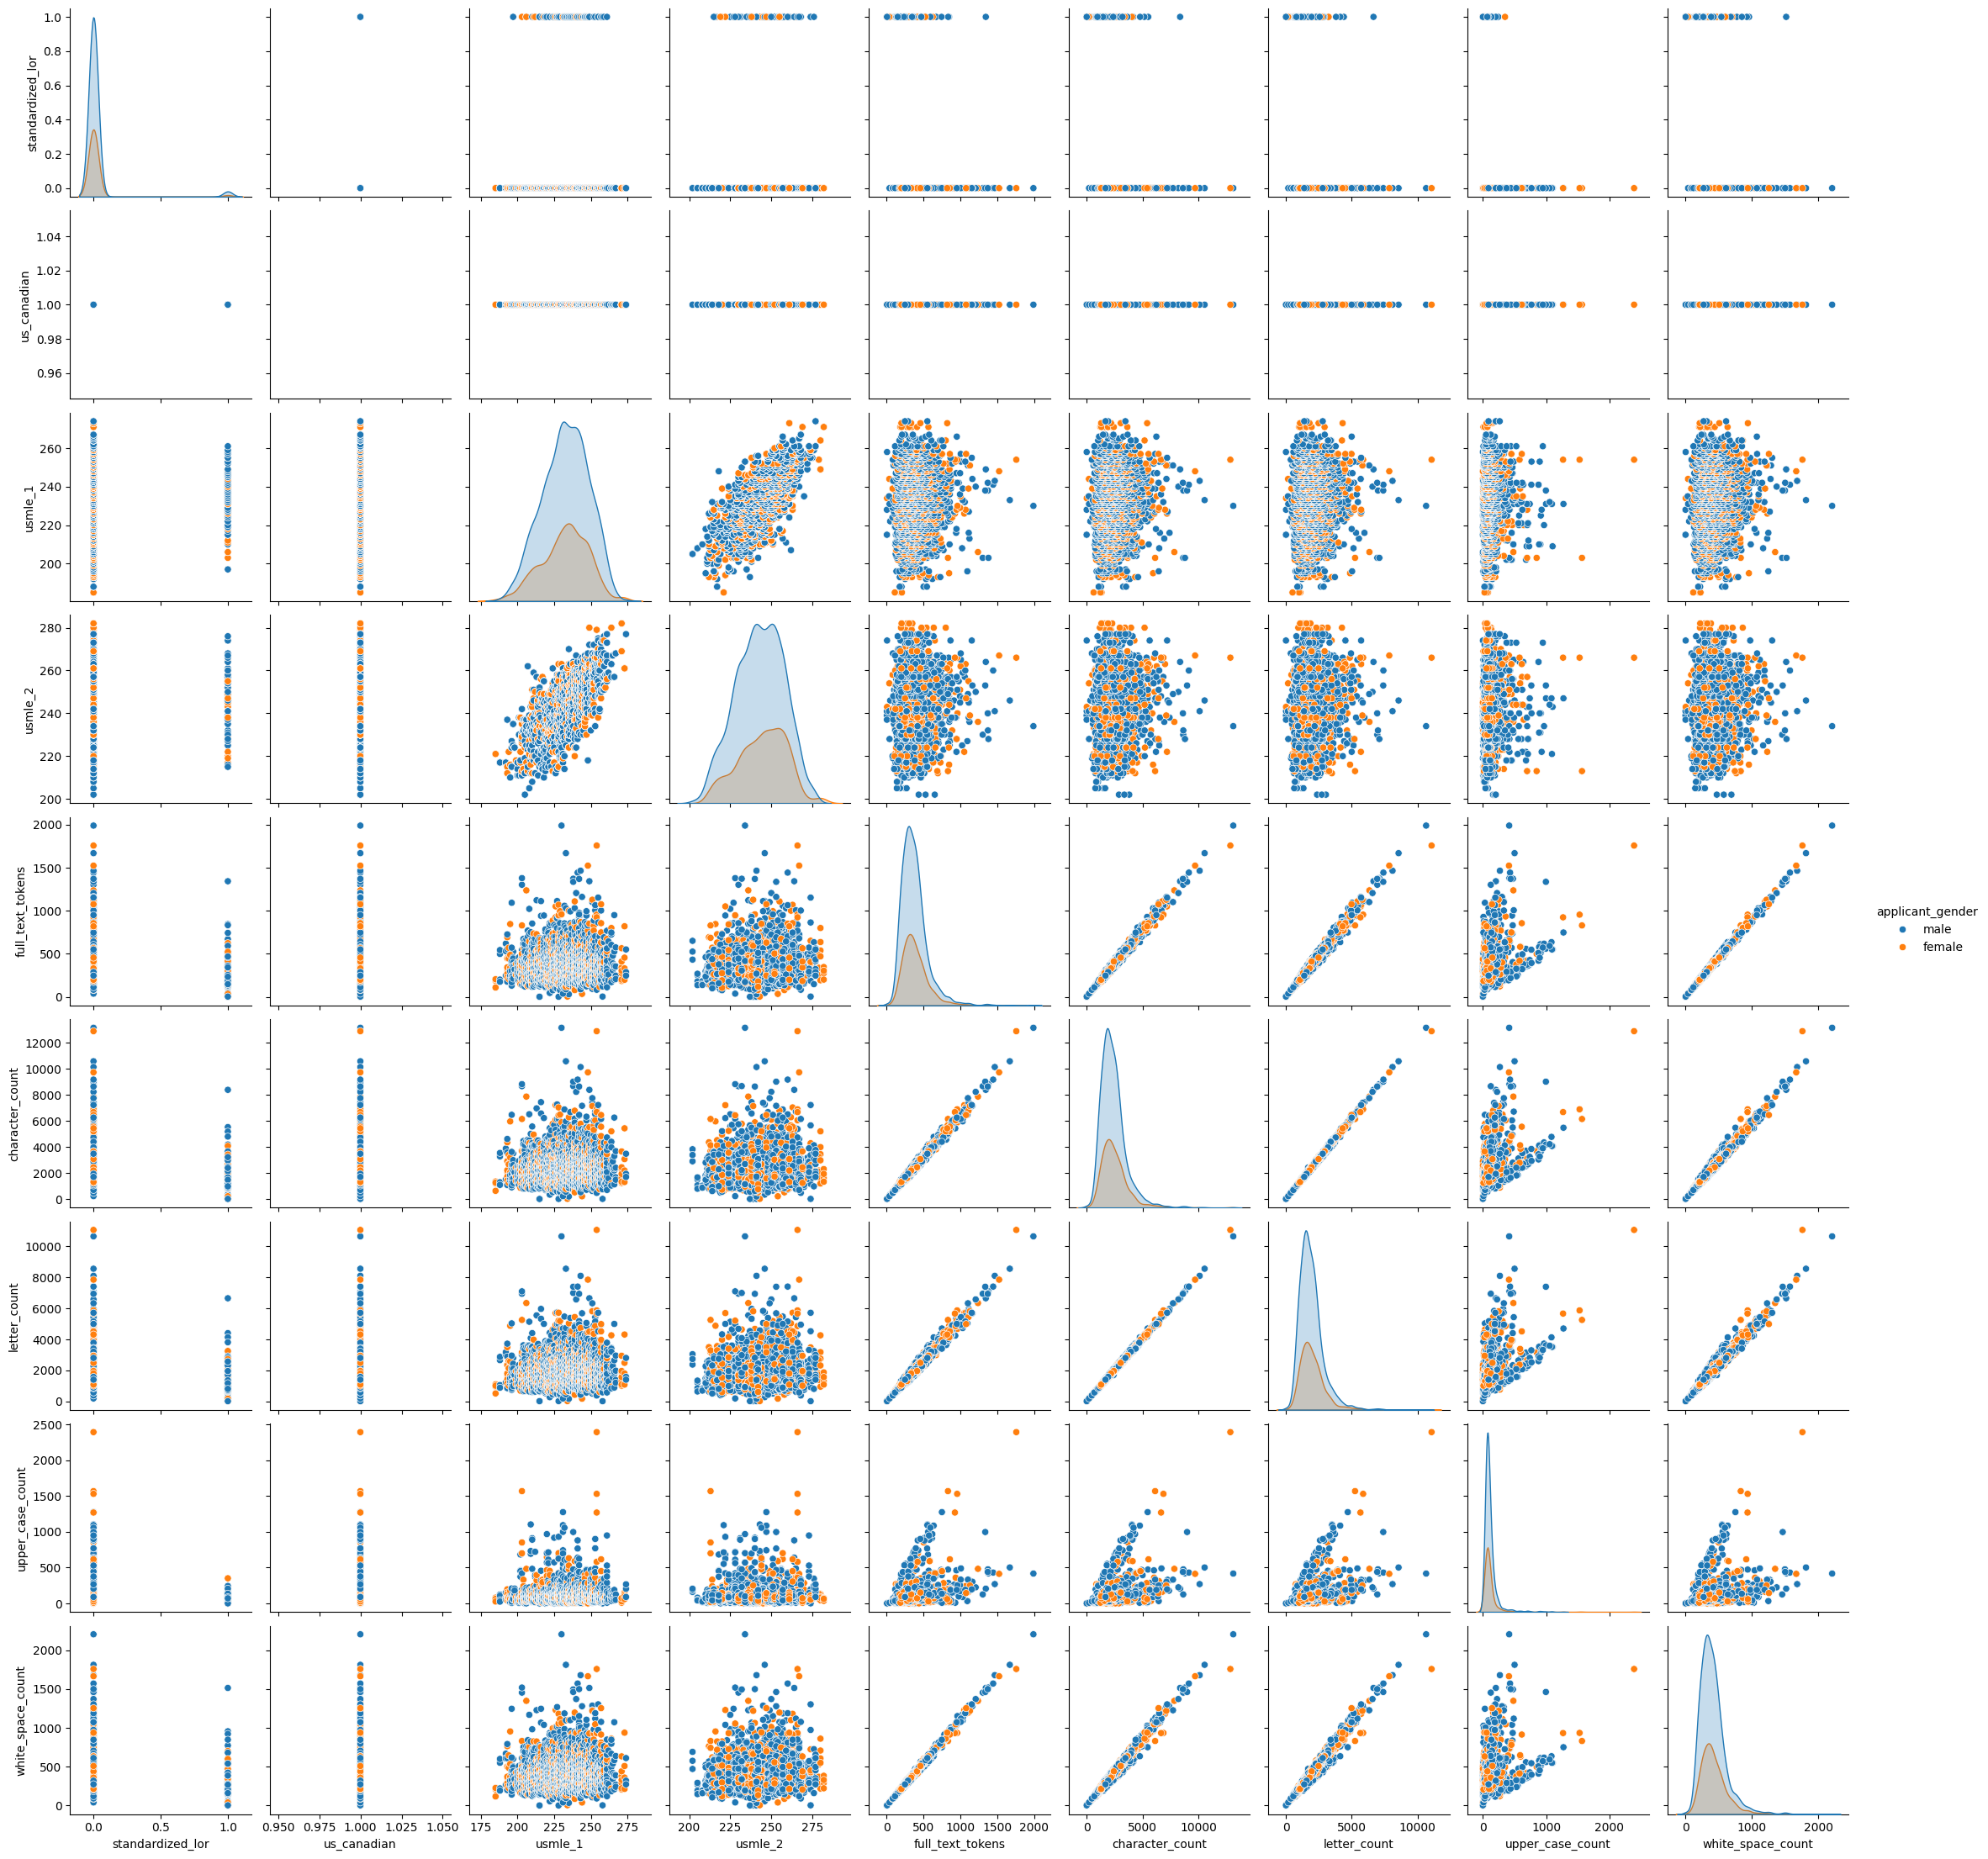

In [35]:
import seaborn as sns

sns.pairplot(data=sentence_data, hue="applicant_gender")
